In [89]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import json
import random
import requests
import os
import numpy as np

## Import CSV from local 

In [90]:
vac_csv = f"C:/capes_sql/vacunacio.csv"
vac_m = pd.read_csv(vac_csv, sep=',')

In [91]:
vac_m = vac_m.groupby(['MUNICIPI']).sum()
vac_m = vac_m.drop(columns=['SEXE_CODI', 'PROVINCIA_CODI', 'COMARCA_CODI','DISTRICTE_CODI','DOSI'])
vac_m['Municipi'] = vac_m.index


In [92]:
pobl_csv = f"C:/capes_sql/pomuni.csv"
pobl = pd.read_csv(pobl_csv, sep=';',skiprows=range(0, 4), thousands='.')#comensa a la 5, mo oblidar sep
pobl.head(93)

,Unnamed: 0,Codi municipi,Nom municipi,Edat,Homes,Dones,Total
0,2020,250019,Abella de la Conca,De 0 anys,0,0,0
1,2020,250019,Abella de la Conca,D'1 any,0,2,2
2,2020,250019,Abella de la Conca,De 2 anys,1,0,1
3,2020,250019,Abella de la Conca,De 3 anys,0,0,0
4,2020,250019,Abella de la Conca,De 4 anys,0,1,1
...,...,...,...,...,...,...,...
88,2020,250019,Abella de la Conca,De 88 anys,1,2,3
89,2020,250019,Abella de la Conca,De 89 anys,1,1,2
90,2020,250019,Abella de la Conca,De 90 anys,0,0,0
91,2020,250019,Abella de la Conca,De 91 anys,0,0,0


In [93]:
# Seleccionar total
pobl =pobl.loc[pobl['Edat'] == "Total"]
pobl.head(93)

,Unnamed: 0,Codi municipi,Nom municipi,Edat,Homes,Dones,Total
101,2020,250019,Abella de la Conca,Total,99,84,183
203,2020,80018,Abrera,Total,6325,6213,12538
305,2020,250024,Àger,Total,314,266,580
407,2020,250030,Agramunt,Total,2710,2701,5411
509,2020,80023,Aguilar de Segarra,Total,148,134,282
...,...,...,...,...,...,...,...
9077,2020,430213,Barberà de la Conca,Total,260,211,471
9179,2020,82520,Barberà del Vallès,Total,16395,16939,33334
9281,2020,80193,Barcelona,Total,790708,873474,1664182
9383,2020,250426,"Baronia de Rialb, la",Total,116,113,229


In [94]:
pobl.head()

,Unnamed: 0,Codi municipi,Nom municipi,Edat,Homes,Dones,Total
101,2020,250019,Abella de la Conca,Total,99,84,183
203,2020,80018,Abrera,Total,6325,6213,12538
305,2020,250024,Àger,Total,314,266,580
407,2020,250030,Agramunt,Total,2710,2701,5411
509,2020,80023,Aguilar de Segarra,Total,148,134,282


In [95]:
pobl['Total'] = pobl['Total'].astype(np.int64)
pobl.head(93)

,Unnamed: 0,Codi municipi,Nom municipi,Edat,Homes,Dones,Total
101,2020,250019,Abella de la Conca,Total,99,84,183
203,2020,80018,Abrera,Total,6325,6213,12538
305,2020,250024,Àger,Total,314,266,580
407,2020,250030,Agramunt,Total,2710,2701,5411
509,2020,80023,Aguilar de Segarra,Total,148,134,282
...,...,...,...,...,...,...,...
9077,2020,430213,Barberà de la Conca,Total,260,211,471
9179,2020,82520,Barberà del Vallès,Total,16395,16939,33334
9281,2020,80193,Barcelona,Total,790708,873474,1664182
9383,2020,250426,"Baronia de Rialb, la",Total,116,113,229


In [96]:
pobl.dtypes

Unnamed: 0        int64
Codi municipi     int64
Nom municipi     object
Edat             object
Homes             int64
Dones             int64
Total             int64
dtype: object

In [97]:
pobl['Habitants'] = pobl['Homes'] + pobl['Dones']
pobl['Habitants'] = pobl['Habitants'].astype(np.int64)
pobl_t = pobl.groupby(['Nom municipi']).sum()
pobl = pobl_t.drop(columns=['Unnamed: 0', 'Dones', 'Homes'])
pobl['Municipi'] = pobl.index
pobl['Municipi'] = pobl['Municipi'].str.upper()

In [98]:
pobl.head(90)

,Codi municipi,Total,Habitants,Municipi
Nom municipi,,,,
Abella de la Conca,250019,183,183,ABELLA DE LA CONCA
Abrera,80018,12538,12538,ABRERA
Agramunt,250030,5411,5411,AGRAMUNT
Aguilar de Segarra,80023,282,282,AGUILAR DE SEGARRA
Agullana,170010,863,863,AGULLANA
...,...,...,...,...
Banyoles,170157,20053,20053,BANYOLES
Barbens,250411,878,878,BARBENS
Barberà de la Conca,430213,471,471,BARBERÀ DE LA CONCA


In [99]:
pobl.max()

Codi municipi     439076
Total            1664182
Habitants        1664182
Municipi          ÒRRIUS
dtype: object

In [100]:
pobl.loc[pobl['Habitants'] > 50000]

,Codi municipi,Total,Habitants,Municipi
Nom municipi,,,,
Badalona,80155,223166,223166,BADALONA
Barcelona,80193,1664182,1664182,BARCELONA
Castelldefels,80569,67460,67460,CASTELLDEFELS
Cerdanyola del Vallès,82665,57855,57855,CERDANYOLA DEL VALLÈS
Cornellà de Llobregat,80734,89936,89936,CORNELLÀ DE LLOBREGAT
Girona,170792,103369,103369,GIRONA
Granollers,80961,62419,62419,GRANOLLERS
"Hospitalet de Llobregat, l'",81017,269382,269382,"HOSPITALET DE LLOBREGAT, L'"
Lleida,251207,140403,140403,LLEIDA


###  Joint left

In [101]:
df_m = pd.merge(pobl, vac_m, how='left')

In [102]:
df_m['Taxa_vacunacio'] = df_m['RECOMPTE']/df_m['Habitants']*100
df_m = df_m.drop(columns=['Codi municipi','MUNICIPI_CODI','RECOMPTE','Habitants'])
df_m.head(3)

,Total,Municipi,Taxa_vacunacio
0,183,ABELLA DE LA CONCA,NaN
1,12538,ABRERA,89.535811
2,5411,AGRAMUNT,103.844021


In [103]:
df_m.loc[df_m['Taxa_vacunacio'] > 100]

,Total,Municipi,Taxa_vacunacio
2,5411,AGRAMUNT,103.844021
5,2512,AIGUAFREDA,101.472930
13,1561,ALBESA,104.804612
19,238,ALCANÓ,113.025210
24,905,ALDOVER,100.994475
...,...,...,...
929,21035,VILASSAR DE MAR,100.033278
938,890,VIMBODÍ I POBLET,110.224719
939,450,VINAIXA,113.111111
940,425,VINEBRE,104.235294


# Join data amb spatial data

In [104]:
import geopandas as gpd
import geoplot as gplt

In [105]:
geoData=gpd.read_file('C:/capes_sql/limits_muni_catalunya.geojson')
# trans muni json en maj
geoData['nom_muni'] = geoData['nom_muni'].str.upper()
geoData.head(2)

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9..."
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9..."


In [106]:
print(geoData.dtypes)

codi_ine_6       object
provincia1       object
codi_costa       object
codi_ptgc_       object
comarca1         object
id               object
nom_muni         object
municipi         object
codi_cadas       object
codi_aft         object
_feature_id      object
codi_ptgc        object
cap_muni         object
codiine          object
geometry       geometry
dtype: object


In [107]:
fullData = geoData.merge(df_m, left_on=['nom_muni'], right_on=['Municipi'])
fullData.head(2)

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG,108.521537
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217,BASSELLA,NaN


In [108]:
#the best option may be full data because the null values can not be treated as integer
left_merged = pd.merge(geoData, df_m, how="left", left_on=['nom_muni'], right_on=['Municipi'])
left_merged.head(2)

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295.0,PUIG-REIG,108.521537
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217.0,BASSELLA,NaN


In [109]:
#dataframe a geodataframe https://gis.stackexchange.com/questions/376204/converting-dataframe-with-geometry-column-into-geodataframe-in-pandas
#left_merged = gpd.GeoDataFrame(left_merged[['nom_muni', 'cap_muni']], geometry=left_merged['geometry'].apply(lambda x: x[0]))

<AxesSubplot:>

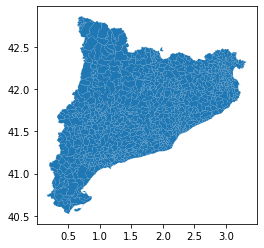

In [110]:
left_merged.plot()

<AxesSubplot:>

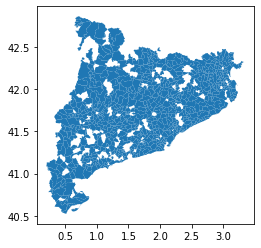

In [111]:
fullData.plot()

In [112]:
print(fullData.dtypes)

codi_ine_6          object
provincia1          object
codi_costa          object
codi_ptgc_          object
comarca1            object
id                  object
nom_muni            object
municipi            object
codi_cadas          object
codi_aft            object
_feature_id         object
codi_ptgc           object
cap_muni            object
codiine             object
geometry          geometry
Total                int64
Municipi            object
Taxa_vacunacio     float64
dtype: object


In [113]:
print(fullData2.dtypes)

Codi municipi       int64
Total               int64
Habitants           int64
Municipi           object
MUNICIPI_CODI     float64
RECOMPTE          float64
codi_ine_6         object
provincia1         object
codi_costa         object
codi_ptgc_         object
comarca1           object
id                 object
nom_muni           object
municipi           object
codi_cadas         object
codi_aft           object
_feature_id        object
codi_ptgc          object
cap_muni           object
codiine            object
geometry         geometry
dtype: object


# Export data

In [114]:
fullData.to_file("C:/capes_sql/vacunesxcent.shp")

<ipython-input-114-1133d6a27131>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  fullData.to_file("C:/capes_sql/vacunesxcent.shp")


In [115]:
left_merged.to_file("C:/capes_sql/vacunesxcent_left.shp")

<ipython-input-115-b2ffc686ddd1>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  left_merged.to_file("C:/capes_sql/vacunesxcent_left.shp")


<AxesSubplot:>

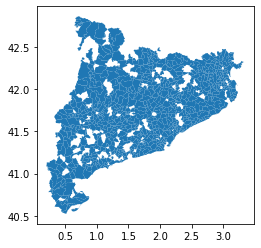

In [116]:
fullData.plot()

# Data cleaning

# 1_ Handlinng missing data

In [425]:
df = fullData

In [426]:
pd.isnull(df).sum() #numro de valors null

codi_ine_6          0
provincia1          0
codi_costa          0
codi_ptgc_          0
comarca1            0
id                  0
nom_muni            0
municipi            0
codi_cadas          0
codi_aft            0
_feature_id         0
codi_ptgc           0
cap_muni            0
codiine             0
geometry            0
Total               0
Municipi            0
Taxa_vacunacio    155
dtype: int64

In [433]:
dfnonulls = df[pd.notnull(df)] # elimina rows amb valors nulls

<AxesSubplot:>

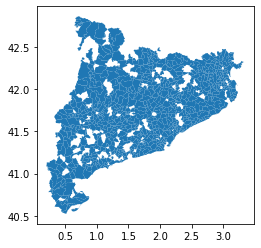

In [434]:
dfnonulls.plot()

In [375]:
df.dropna() #Dropping null values ROWS

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG,108.521537
2,0.0,,0.0,,,310.0,OSOR,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9...",428,OSOR,82.009346
3,0.0,,0.0,,,311.0,GURB,081000,,,9,,Gurb,08100,"MULTIPOLYGON (((2.28961 41.96064, 2.28857 41.9...",2713,GURB,99.373387
4,0.0,,0.0,,,314.0,ORISTÀ,081516,,,17,,Oristà,08151,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9...",549,ORISTÀ,95.810565
5,0.0,,0.0,,,920.0,TIVENYS,431495,,,44,,Tivenys,43149,"MULTIPOLYGON (((0.61764 40.88993, 0.60633 40.8...",902,TIVENYS,119.623060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.0,,0.0,,,664.0,SANT FOST DE CAMPSENTELLES,082093,,,941,,Sant Fost de Campsentelles,08209,"MULTIPOLYGON (((2.20337 41.50385, 2.20366 41.5...",8853,SANT FOST DE CAMPSENTELLES,100.463120
810,0.0,,0.0,,,889.0,RIUDECANYES,431270,,,942,,Riudecanyes,43127,"MULTIPOLYGON (((0.98107 41.13371, 0.97988 41.1...",1146,RIUDECANYES,81.151832
811,0.0,,0.0,,,665.0,SARROCA DE LLEIDA,252000,,,944,,Sarroca de Lleida,25200,"MULTIPOLYGON (((0.52870 41.43169, 0.52977 41.4...",358,SARROCA DE LLEIDA,122.346369
812,0.0,,0.0,,,669.0,CASTELLBISBAL,080543,,,946,,Castellbisbal,08054,"MULTIPOLYGON (((1.98996 41.43990, 1.98881 41.4...",12539,CASTELLBISBAL,86.498126


In [423]:
df.info() # veru useful!!!!!

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   codi_ine_6      814 non-null    object  
 1   provincia1      814 non-null    object  
 2   codi_costa      814 non-null    object  
 3   codi_ptgc_      814 non-null    object  
 4   comarca1        814 non-null    object  
 5   id              814 non-null    object  
 6   nom_muni        814 non-null    object  
 7   municipi        814 non-null    object  
 8   codi_cadas      814 non-null    object  
 9   codi_aft        814 non-null    object  
 10  _feature_id     814 non-null    object  
 11  codi_ptgc       814 non-null    object  
 12  cap_muni        814 non-null    object  
 13  codiine         814 non-null    object  
 14  geometry        814 non-null    geometry
 15  Total           814 non-null    int64   
 16  Municipi        814 non-null    object  
 17  Taxa_vac

In [377]:
df.isnull().sum()

codi_ine_6          0
provincia1          0
codi_costa          0
codi_ptgc_          0
comarca1            0
id                  0
nom_muni            0
municipi            0
codi_cadas          0
codi_aft            0
_feature_id         0
codi_ptgc           0
cap_muni            0
codiine             0
geometry            0
Total               0
Municipi            0
Taxa_vacunacio    155
dtype: int64

In [379]:
df.dropna(axis=1)  # axis='columns' also works, elimina columns amb null values 

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217,BASSELLA
2,0.0,,0.0,,,310.0,OSOR,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9...",428,OSOR
3,0.0,,0.0,,,311.0,GURB,081000,,,9,,Gurb,08100,"MULTIPOLYGON (((2.28961 41.96064, 2.28857 41.9...",2713,GURB
4,0.0,,0.0,,,314.0,ORISTÀ,081516,,,17,,Oristà,08151,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9...",549,ORISTÀ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.0,,0.0,,,664.0,SANT FOST DE CAMPSENTELLES,082093,,,941,,Sant Fost de Campsentelles,08209,"MULTIPOLYGON (((2.20337 41.50385, 2.20366 41.5...",8853,SANT FOST DE CAMPSENTELLES
810,0.0,,0.0,,,889.0,RIUDECANYES,431270,,,942,,Riudecanyes,43127,"MULTIPOLYGON (((0.98107 41.13371, 0.97988 41.1...",1146,RIUDECANYES
811,0.0,,0.0,,,665.0,SARROCA DE LLEIDA,252000,,,944,,Sarroca de Lleida,25200,"MULTIPOLYGON (((0.52870 41.43169, 0.52977 41.4...",358,SARROCA DE LLEIDA
812,0.0,,0.0,,,669.0,CASTELLBISBAL,080543,,,946,,Castellbisbal,08054,"MULTIPOLYGON (((1.98996 41.43990, 1.98881 41.4...",12539,CASTELLBISBAL


In [380]:
df.dropna(how='all')# drop the col o rows that have all the values as null

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG,108.521537
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217,BASSELLA,NaN
2,0.0,,0.0,,,310.0,OSOR,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9...",428,OSOR,82.009346
3,0.0,,0.0,,,311.0,GURB,081000,,,9,,Gurb,08100,"MULTIPOLYGON (((2.28961 41.96064, 2.28857 41.9...",2713,GURB,99.373387
4,0.0,,0.0,,,314.0,ORISTÀ,081516,,,17,,Oristà,08151,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9...",549,ORISTÀ,95.810565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.0,,0.0,,,664.0,SANT FOST DE CAMPSENTELLES,082093,,,941,,Sant Fost de Campsentelles,08209,"MULTIPOLYGON (((2.20337 41.50385, 2.20366 41.5...",8853,SANT FOST DE CAMPSENTELLES,100.463120
810,0.0,,0.0,,,889.0,RIUDECANYES,431270,,,942,,Riudecanyes,43127,"MULTIPOLYGON (((0.98107 41.13371, 0.97988 41.1...",1146,RIUDECANYES,81.151832
811,0.0,,0.0,,,665.0,SARROCA DE LLEIDA,252000,,,944,,Sarroca de Lleida,25200,"MULTIPOLYGON (((0.52870 41.43169, 0.52977 41.4...",358,SARROCA DE LLEIDA,122.346369
812,0.0,,0.0,,,669.0,CASTELLBISBAL,080543,,,946,,Castellbisbal,08054,"MULTIPOLYGON (((1.98996 41.43990, 1.98881 41.4...",12539,CASTELLBISBAL,86.498126


In [381]:
df.dropna(thresh=3)# drop col or rowa with 3 or more null values

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG,108.521537
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217,BASSELLA,NaN
2,0.0,,0.0,,,310.0,OSOR,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9...",428,OSOR,82.009346
3,0.0,,0.0,,,311.0,GURB,081000,,,9,,Gurb,08100,"MULTIPOLYGON (((2.28961 41.96064, 2.28857 41.9...",2713,GURB,99.373387
4,0.0,,0.0,,,314.0,ORISTÀ,081516,,,17,,Oristà,08151,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9...",549,ORISTÀ,95.810565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.0,,0.0,,,664.0,SANT FOST DE CAMPSENTELLES,082093,,,941,,Sant Fost de Campsentelles,08209,"MULTIPOLYGON (((2.20337 41.50385, 2.20366 41.5...",8853,SANT FOST DE CAMPSENTELLES,100.463120
810,0.0,,0.0,,,889.0,RIUDECANYES,431270,,,942,,Riudecanyes,43127,"MULTIPOLYGON (((0.98107 41.13371, 0.97988 41.1...",1146,RIUDECANYES,81.151832
811,0.0,,0.0,,,665.0,SARROCA DE LLEIDA,252000,,,944,,Sarroca de Lleida,25200,"MULTIPOLYGON (((0.52870 41.43169, 0.52977 41.4...",358,SARROCA DE LLEIDA,122.346369
812,0.0,,0.0,,,669.0,CASTELLBISBAL,080543,,,946,,Castellbisbal,08054,"MULTIPOLYGON (((1.98996 41.43990, 1.98881 41.4...",12539,CASTELLBISBAL,86.498126


# Filling null values

In [383]:
df.fillna(df) # fill the null values as 0

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG,108.521537
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217,BASSELLA,NaN
2,0.0,,0.0,,,310.0,OSOR,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9...",428,OSOR,82.009346
3,0.0,,0.0,,,311.0,GURB,081000,,,9,,Gurb,08100,"MULTIPOLYGON (((2.28961 41.96064, 2.28857 41.9...",2713,GURB,99.373387
4,0.0,,0.0,,,314.0,ORISTÀ,081516,,,17,,Oristà,08151,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9...",549,ORISTÀ,95.810565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.0,,0.0,,,664.0,SANT FOST DE CAMPSENTELLES,082093,,,941,,Sant Fost de Campsentelles,08209,"MULTIPOLYGON (((2.20337 41.50385, 2.20366 41.5...",8853,SANT FOST DE CAMPSENTELLES,100.463120
810,0.0,,0.0,,,889.0,RIUDECANYES,431270,,,942,,Riudecanyes,43127,"MULTIPOLYGON (((0.98107 41.13371, 0.97988 41.1...",1146,RIUDECANYES,81.151832
811,0.0,,0.0,,,665.0,SARROCA DE LLEIDA,252000,,,944,,Sarroca de Lleida,25200,"MULTIPOLYGON (((0.52870 41.43169, 0.52977 41.4...",358,SARROCA DE LLEIDA,122.346369
812,0.0,,0.0,,,669.0,CASTELLBISBAL,080543,,,946,,Castellbisbal,08054,"MULTIPOLYGON (((1.98996 41.43990, 1.98881 41.4...",12539,CASTELLBISBAL,86.498126


In [389]:
df.fillna(df.mean()) # fill the null values as mean

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG,108.521537
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217,BASSELLA,91.126713
2,0.0,,0.0,,,310.0,OSOR,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9...",428,OSOR,82.009346
3,0.0,,0.0,,,311.0,GURB,081000,,,9,,Gurb,08100,"MULTIPOLYGON (((2.28961 41.96064, 2.28857 41.9...",2713,GURB,99.373387
4,0.0,,0.0,,,314.0,ORISTÀ,081516,,,17,,Oristà,08151,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9...",549,ORISTÀ,95.810565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.0,,0.0,,,664.0,SANT FOST DE CAMPSENTELLES,082093,,,941,,Sant Fost de Campsentelles,08209,"MULTIPOLYGON (((2.20337 41.50385, 2.20366 41.5...",8853,SANT FOST DE CAMPSENTELLES,100.463120
810,0.0,,0.0,,,889.0,RIUDECANYES,431270,,,942,,Riudecanyes,43127,"MULTIPOLYGON (((0.98107 41.13371, 0.97988 41.1...",1146,RIUDECANYES,81.151832
811,0.0,,0.0,,,665.0,SARROCA DE LLEIDA,252000,,,944,,Sarroca de Lleida,25200,"MULTIPOLYGON (((0.52870 41.43169, 0.52977 41.4...",358,SARROCA DE LLEIDA,122.346369
812,0.0,,0.0,,,669.0,CASTELLBISBAL,080543,,,946,,Castellbisbal,08054,"MULTIPOLYGON (((1.98996 41.43990, 1.98881 41.4...",12539,CASTELLBISBAL,86.498126


# Filling nulls with contiguous (close) values

In [392]:
#df.fillna(method='ffill') # null as the same last value  SERIES

# Filling null values on DataFrames

In [393]:
df.fillna({'Taxa_vacunacio': df['Taxa_vacunacio'].mean()}) #fill missing data with this value

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG,108.521537
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217,BASSELLA,91.126713
2,0.0,,0.0,,,310.0,OSOR,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9...",428,OSOR,82.009346
3,0.0,,0.0,,,311.0,GURB,081000,,,9,,Gurb,08100,"MULTIPOLYGON (((2.28961 41.96064, 2.28857 41.9...",2713,GURB,99.373387
4,0.0,,0.0,,,314.0,ORISTÀ,081516,,,17,,Oristà,08151,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9...",549,ORISTÀ,95.810565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.0,,0.0,,,664.0,SANT FOST DE CAMPSENTELLES,082093,,,941,,Sant Fost de Campsentelles,08209,"MULTIPOLYGON (((2.20337 41.50385, 2.20366 41.5...",8853,SANT FOST DE CAMPSENTELLES,100.463120
810,0.0,,0.0,,,889.0,RIUDECANYES,431270,,,942,,Riudecanyes,43127,"MULTIPOLYGON (((0.98107 41.13371, 0.97988 41.1...",1146,RIUDECANYES,81.151832
811,0.0,,0.0,,,665.0,SARROCA DE LLEIDA,252000,,,944,,Sarroca de Lleida,25200,"MULTIPOLYGON (((0.52870 41.43169, 0.52977 41.4...",358,SARROCA DE LLEIDA,122.346369
812,0.0,,0.0,,,669.0,CASTELLBISBAL,080543,,,946,,Castellbisbal,08054,"MULTIPOLYGON (((1.98996 41.43990, 1.98881 41.4...",12539,CASTELLBISBAL,86.498126


In [399]:
#df.fillna(method='ffill', axis=0) # row, the las value row

In [397]:
df.fillna(method='ffill', axis=1) # coldf.fillna(method='ffill', axis=1) # fill the value with the value of the last col

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",4295,PUIG-REIG,108.521537
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",217,BASSELLA,BASSELLA
2,0.0,,0.0,,,310.0,OSOR,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9...",428,OSOR,82.009346
3,0.0,,0.0,,,311.0,GURB,081000,,,9,,Gurb,08100,"MULTIPOLYGON (((2.28961 41.96064, 2.28857 41.9...",2713,GURB,99.373387
4,0.0,,0.0,,,314.0,ORISTÀ,081516,,,17,,Oristà,08151,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9...",549,ORISTÀ,95.810565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.0,,0.0,,,664.0,SANT FOST DE CAMPSENTELLES,082093,,,941,,Sant Fost de Campsentelles,08209,"MULTIPOLYGON (((2.20337 41.50385, 2.20366 41.5...",8853,SANT FOST DE CAMPSENTELLES,100.46312
810,0.0,,0.0,,,889.0,RIUDECANYES,431270,,,942,,Riudecanyes,43127,"MULTIPOLYGON (((0.98107 41.13371, 0.97988 41.1...",1146,RIUDECANYES,81.151832
811,0.0,,0.0,,,665.0,SARROCA DE LLEIDA,252000,,,944,,Sarroca de Lleida,25200,"MULTIPOLYGON (((0.52870 41.43169, 0.52977 41.4...",358,SARROCA DE LLEIDA,122.346369
812,0.0,,0.0,,,669.0,CASTELLBISBAL,080543,,,946,,Castellbisbal,08054,"MULTIPOLYGON (((1.98996 41.43990, 1.98881 41.4...",12539,CASTELLBISBAL,86.498126


# Checking if there are NAs

In [400]:
df.dropna().count()

codi_ine_6        659
provincia1        659
codi_costa        659
codi_ptgc_        659
comarca1          659
id                659
nom_muni          659
municipi          659
codi_cadas        659
codi_aft          659
_feature_id       659
codi_ptgc         659
cap_muni          659
codiine           659
geometry          659
Total             659
Municipi          659
Taxa_vacunacio    659
dtype: int64

In [402]:
len(df)

814

In [403]:
df.count()

codi_ine_6        814
provincia1        814
codi_costa        814
codi_ptgc_        814
comarca1          814
id                814
nom_muni          814
municipi          814
codi_cadas        814
codi_aft          814
_feature_id       814
codi_ptgc         814
cap_muni          814
codiine           814
geometry          814
Total             814
Municipi          814
Taxa_vacunacio    659
dtype: int64

In [405]:
missing_values = df.count() != len(df)
missing_values

codi_ine_6        False
provincia1        False
codi_costa        False
codi_ptgc_        False
comarca1          False
id                False
nom_muni          False
municipi          False
codi_cadas        False
codi_aft          False
_feature_id       False
codi_ptgc         False
cap_muni          False
codiine           False
geometry          False
Total             False
Municipi          False
Taxa_vacunacio     True
dtype: bool

# 2 Cleaning not-null values

### Finding Unique Values

In [406]:
df['provincia1'].unique()

array([''], dtype=object)

In [407]:
df['Municipi'].unique()

array(['PUIG-REIG', 'BASSELLA', 'OSOR', 'GURB', 'ORISTÀ', 'TIVENYS',
       'MIERES', 'SANT GREGORI', 'BANYOLES', 'SANT FELIU DE PALLEROLS',
       'SANT ANIOL DE FINESTRES', 'LLUÇÀ', 'CORNELLÀ DEL TERRI',
       'LLIMIANA', 'ÀGER', 'ISONA I CONCA DELLÀ', 'OLIUS',
       'VILANOVA DE MEIÀ', 'AMER', 'SOLSONA', 'GIRONA', 'ARNES',
       'CARDONA', 'MONTMAJOR', 'RUPIT I PRUIT', 'PALOL DE REVARDIT',
       'SANT JULIÀ DE RAMIS', 'ARTESA DE SEGRE', 'TORROELLA DE MONTGRÍ',
       'MONT-ROIG DEL CAMP', 'TIVISSA', 'SALOU', 'CASERES',
       "VANDELLÒS I L'HOSPITALET DE L'INFANT", 'BENIFALLET',
       "CORBERA D'EBRE", 'CADAQUÉS', 'JOSA I TUIXÉN', 'GOMBRÈN', 'CABÓ',
       'GANDESA', 'ROQUETES', 'DELTEBRE', 'MAS DE BARBERANS', 'ULLDECONA',
       'AMPOSTA', 'ALCANAR', 'SANT CARLES DE LA RÀPITA', 'TARRAGONA',
       'VILA-SECA', 'BEUDA', 'PERALADA', 'SANT LLORENÇ DE LA MUGA',
       'RIBES DE FRESER', 'MONTAGUT I OIX', 'SANT JOAN DE LES ABADESSES',
       'SANT PERE PESCADOR', 'PORTBOU', 'ALCOVE

In [408]:
#df['Sex'].replace('D', 'F') #replace method
#df['Sex'].replace({'D': 'F', 'N': 'M'})
#df.replace({
#    'Sex': {
 #       'D': 'F',
 #       'N': 'M'
 #   },
  #  'Age': {
   #     290: 29
    #}
#})

In [409]:
df[df['Taxa_vacunacio'] > 200] # semblanta dades covis

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry,Total,Municipi,Taxa_vacunacio


## Duplicates

In [410]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
809    False
810    False
811    False
812    False
813    False
Length: 814, dtype: bool

In [412]:
df.duplicated(subset=['Municipi'])

0      False
1      False
2      False
3      False
4      False
       ...  
809    False
810    False
811    False
812    False
813    False
Length: 814, dtype: bool

In [414]:
#players.duplicated(subset=['Name'], keep='last')
#players.drop_duplicates()